In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

IceCream = pd.read_csv('IceCreamData.csv')

In [3]:
IceCream

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
IceCream.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [5]:
IceCream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


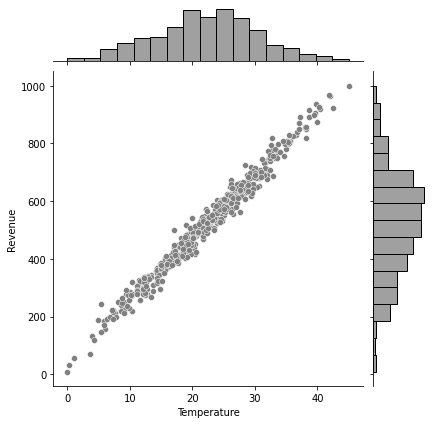

In [6]:
sns.jointplot(x= 'Temperature', y = 'Revenue', data = IceCream, color = 'grey'  )

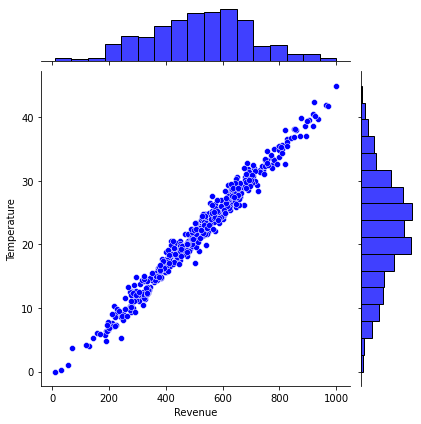

In [8]:
sns.jointplot(x= 'Revenue', y = 'Temperature', data = IceCream, color = 'blue'  )

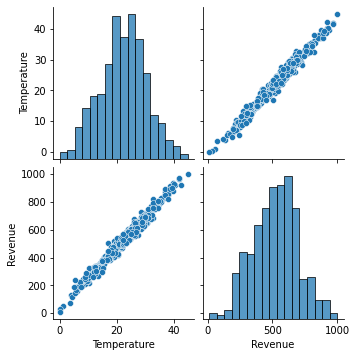

In [9]:
sns.pairplot(IceCream)

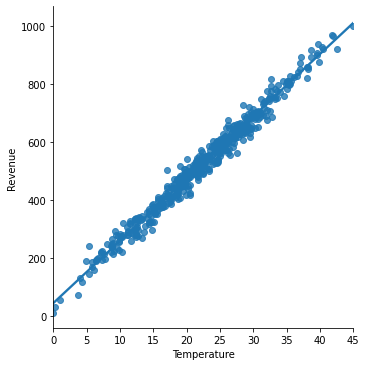

In [10]:
sns.lmplot(x= 'Temperature', y = 'Revenue', data = IceCream)

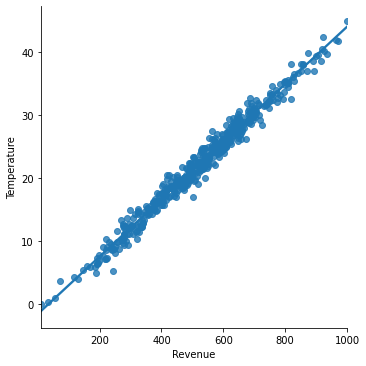

In [11]:
sns.lmplot(x= 'Revenue', y = 'Temperature', data = IceCream)

Divide DataSet into Train and Test

In [15]:
X = IceCream[['Temperature']]

In [17]:
Y = IceCream[['Revenue']]

In [20]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [29]:
X_train

,Temperature
249,18.148952
433,8.756004
19,21.775948
322,18.439982
332,15.843022
...,...
106,23.761436
270,24.628611
348,38.185199
435,15.916678


In [30]:
X_test

,Temperature
361,29.704183
73,27.375401
374,23.984641
155,21.144047
104,26.595054
...,...
347,24.960446
86,27.780500
75,28.790101
438,17.132795


In [31]:
X_train.shape

(400, 1)

In [32]:
X_test.shape

(100, 1)

In [33]:
y_train.shape

(400, 1)

In [34]:
y_test.shape

(100, 1)

# Train the Model

In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train,y_train)

LinearRegression()

In [86]:
regressor.score(X_train,y_train)

0.9802510145652878

In [60]:
print("Linear Model Cofficient (m)",regressor.coef_)
print("Linear Model Cofficient (b)",regressor.intercept_)


Linear Model Cofficient (m) [[21.38197386]]
Linear Model Cofficient (b) [46.80464128]


# Test the Model

In [61]:
y_predict = regressor.predict(X_test)

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean Squared Error", mean_squared_error(y_test,y_predict))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: R2 Score", r2_score(y_test,y_predict))

Mean Squared Error 652.5200612979733
Coefficient of determination: R2 Score 0.9771532792713993


In [62]:
y_predict.shape

(100, 1)

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand (Training set)')

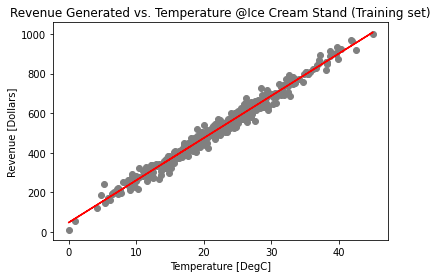

In [63]:
plt.scatter(X_train,y_train, color ='grey')
plt.plot(X_train,regressor.predict(X_train),color = 'red')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand (Training set)')

Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand (Test set)')

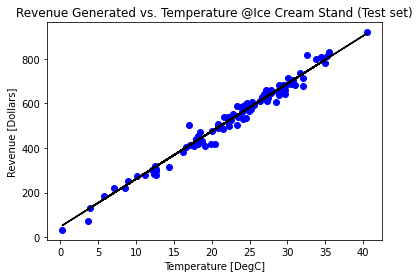

In [64]:
plt.scatter(X_test,y_test, color ='blue')
plt.plot(X_test,regressor.predict(X_test),color = 'black')
plt.ylabel('Revenue [Dollars]')
plt.xlabel('Temperature [DegC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand (Test set)')

In [69]:
T = [[40]]
revenue = regressor.predict(T)

In [70]:
revenue

array([[902.08359549]])

In [85]:
T2 = np.array([[10,25,35]])
T1 = np.array([[1], [2], [3], [4], [5]])
revenue1 = regressor.predict(T1)
revenue1

array([[ 68.18661513],
       [ 89.56858899],
       [110.95056284],
       [132.3325367 ],
       [153.71451055]])

In [74]:
T2 = [[41]]
revenue2 = regressor.predict(T2)
revenue2

array([[923.46556934]])